Plot initial data Figure1:


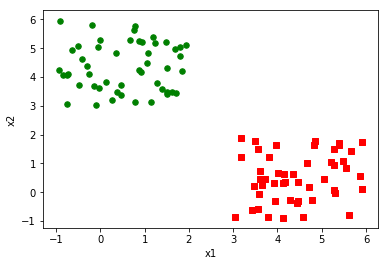

L==H
j not moving enough
j not moving enough
j not moving enough
L==H
j not moving enough
L==H
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
L==H
j not moving enough
L==H
w: [[0.]
 [0.]]
Plot smo fit line Figure2:


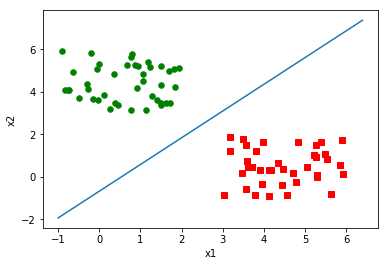

[1.800717232, 4.7193980829]
[4.65843289836, 1.02335640647]
[4.84651438983, 1.77212288381]
[-0.102493330726, 3.02243054272]
[3.58306578584, -0.0552546892855]
[-0.408085139808, 4.63994093422]
[0.476651788651, 3.71276125111]
[3.43244906951, -0.61501369765]
[3.6563360066, 0.249165019742]
[-0.927530203169, 4.25247521352]
[-0.748182736599, 3.07958734727]
[-0.494433745309, 5.06865623513]
[5.90504001062, 0.0989578636762]
[0.878971546079, 4.25780513087]
[4.28358847544, -0.26431429827]
[4.02194748993, 0.682252309987]
[5.65813833906, 1.44799669701]
[5.3880440938, 1.70228266604]
[4.4558760906, -0.30914532529]
[4.13718336471, 0.642498741492]
Accuracy: 1.0
-----------------------------
	Confusion Matrix
-----------------------------
		Predicted
	Actual	NO	YES
-----------------------------
	NO	 8.0 	 0.0
-----------------------------
	YES	 0.0 	 12.0
-----------------------------


In [2]:
from classifier import classifier

class svm_basic(classifier):
    def __init__(self):
        pass
    
    def loadDataSet(self, fileName):
        dataMat = []; labelMat = []
        fr = open(fileName)
        for line in fr.readlines():
            lineArr = line.strip().split(',')
            dataMat.append([float(lineArr[0]), float(lineArr[1])])
            labelMat.append(float(lineArr[2]))
        return dataMat,labelMat
    
    def plot_fit(self, fit_line, datamatrix, labelmatrix):
        import matplotlib.pyplot as plt
        import numpy as np

        
        dataarray = np.asarray(datamatrix)
        n = dataarray.shape[0]

        # Keep track of the two classes in different arrays so they can be plotted later...
        xcord1 = []
        ycord1 = []
        xcord2 = []
        ycord2 = []
        for i in range(n):
            if int(labelmatrix[i]) == 1:
                xcord1.append(dataarray[i, 0])
                ycord1.append(dataarray[i, 1])
            else:
                xcord2.append(dataarray[i, 0])
                ycord2.append(dataarray[i, 1])
        fig = plt.figure()

        # Plot the data as points with different colours
        ax = fig.add_subplot(111)
        ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
        ax.scatter(xcord2, ycord2, s=30, c='green')

        if fit_line:
            weights = fit_line
            # Plot the best-fit line
            x = np.arange(-1.0, 6.5, 0.1)
            y = (-weights[0] - weights[1] * x) / weights[2]
            ax.plot(x, y)

        plt.xlabel('x1')
        plt.ylabel('x2')
        plt.show()
    
    def fit(self, dataMatIn, classLabels):
        from svmMLiA import calcWs
        from svmMLiA import smoPK
        b, alphas = smoPK(dataMatIn, classLabels, 0.6, 0.001, 40)
        ws = calcWs(alphas, dataMatIn, classLabels)
        return b, alphas, ws

    def predict(self, X, weights):
        hypotheses = []
        for x in X:
            print(x)
            prob = weights[0] + weights[1] * x[0] + weights[2] * x[1]
            if prob > 0:
                hypotheses.append(1)
            else:
                hypotheses.append(-1)
        return hypotheses
    
    def accuracy(self, labels, hypotheses):
        count = 0.0
        correct = 0.0

        for l, h in zip(labels, hypotheses):
            count += 1.0
            if l == h:
                correct += 1.0
        return correct / count
    
    def print_confusion_matrix(self, labels, hypotheses):
        tp = 0.0
        tn = 0.0
        fp = 0.0
        fn = 0.0
        count = 1.0
        for l, h in zip(labels, hypotheses):
            count += 1.0
            if l == 1 and h == 1:
                tp += 1.0
            elif l == -1 and h == 1:
                fp += 1.0
            elif l == -1 and h == -1:
                tn += 1.0
            else:
                fn += 1
        print('-----------------------------')
        print('\tConfusion Matrix')
        print('-----------------------------')
        print('\t\tPredicted')
        print('\tActual\tNO\tYES')
        print('-----------------------------')
        print('\tNO\t', tn, '\t', fp)
        print('-----------------------------')
        print('\tYES\t', fn, '\t', tp)
        print('-----------------------------')

    
if __name__ == '__main__':
    svm = svm_basic()
    dataArr, labelArr = svm.loadDataSet('linearly_separable.csv')
    splitlen = int(len(dataArr) * 0.8)
    train_data = dataArr[:splitlen]
    train_label = labelArr[:splitlen]
    test_data = dataArr[splitlen:]
    test_label = labelArr[splitlen:]
    
    print("Plot initial data Figure1:")
    svm.plot_fit(None, dataArr, labelArr)
    b, alphas, ws = svm.fit(train_data, train_label)
    wslist = [b.getA()[0][0], ws[0][0], ws[1][0]]
    print("Plot smo fit line Figure2:")
    svm.plot_fit(wslist, train_data, train_label)
    # print(wslist)
    hypotheses = svm.predict(test_data, wslist)
    print('Accuracy:', svm.accuracy(test_label, hypotheses))
    svm.print_confusion_matrix(test_label, hypotheses)